In [1]:
# load required libraries
options(stringsAsFactors = F)
options (repr.plot.width = 12, repr.plot.height = 5)
suppressPackageStartupMessages({
library(Seurat)
library(harmony)
library(ggplot2)
library(dplyr)
library(Matrix)
library(Hmisc)
library(viridis)
library(RColorBrewer)
library(ggrepel)
library(cowplot)
})
set.seed(123)

In [2]:
# load samples
sample_ctrl <- readRDS("./matrix/subsample_DCM_annotated.rds")
sample_ctrl

sample_exp <- readRDS("./matrix/subsample_CAD_annotated.rds")
sample_exp

An object of class Seurat 
33538 features across 23538 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)
 4 dimensional reductions calculated: pca, harmony, tsne, umap

An object of class Seurat 
33538 features across 18304 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)
 4 dimensional reductions calculated: pca, harmony, tsne, umap

In [3]:
# merge sample and normalize
scList <- list(sample_ctrl, sample_exp)
sample <- merge(scList[[1]], scList[[2]])
# sample <- subset(sample, nFeature_RNA >= 500 & nFeature_RNA <= 5000 & percent.mt <= 10)
sample <- NormalizeData(sample, normalization.method = "LogNormalize", scale.factor = 10000)

# find variable Genes and scale data
sample <- FindVariableFeatures(sample, selection.method = "vst")
sample <- ScaleData(sample)
sample

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Centering and scaling data matrix



An object of class Seurat 
33538 features across 41842 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


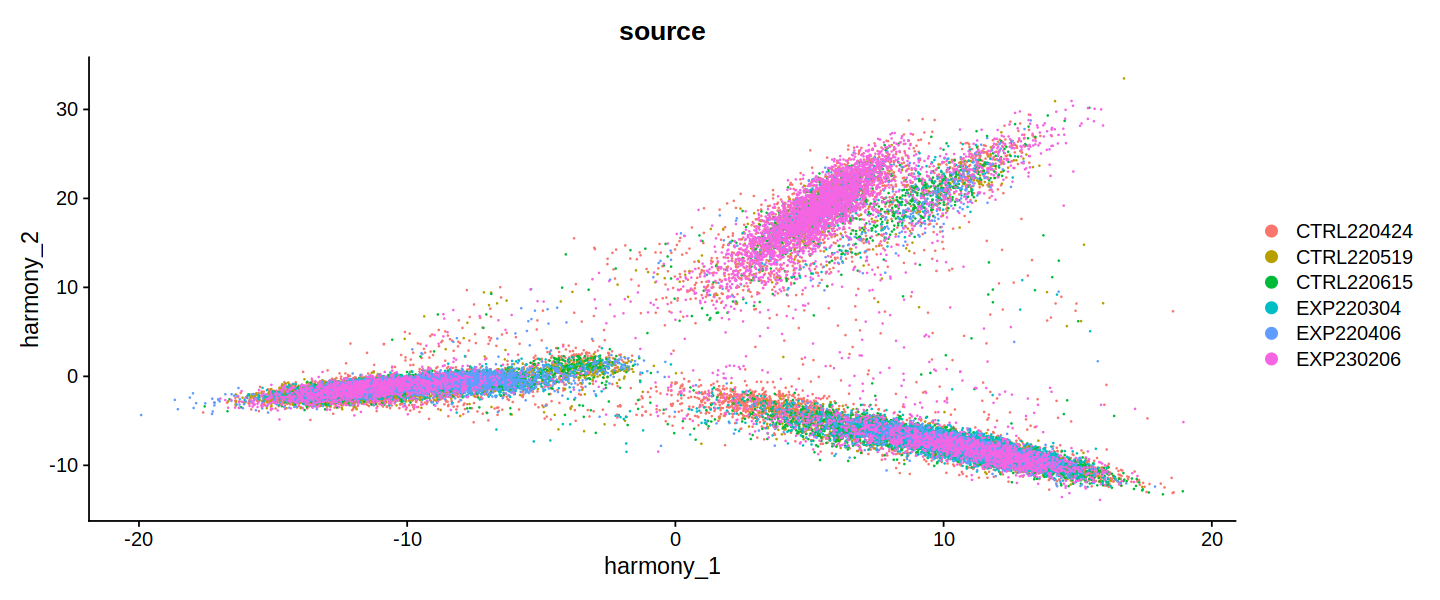

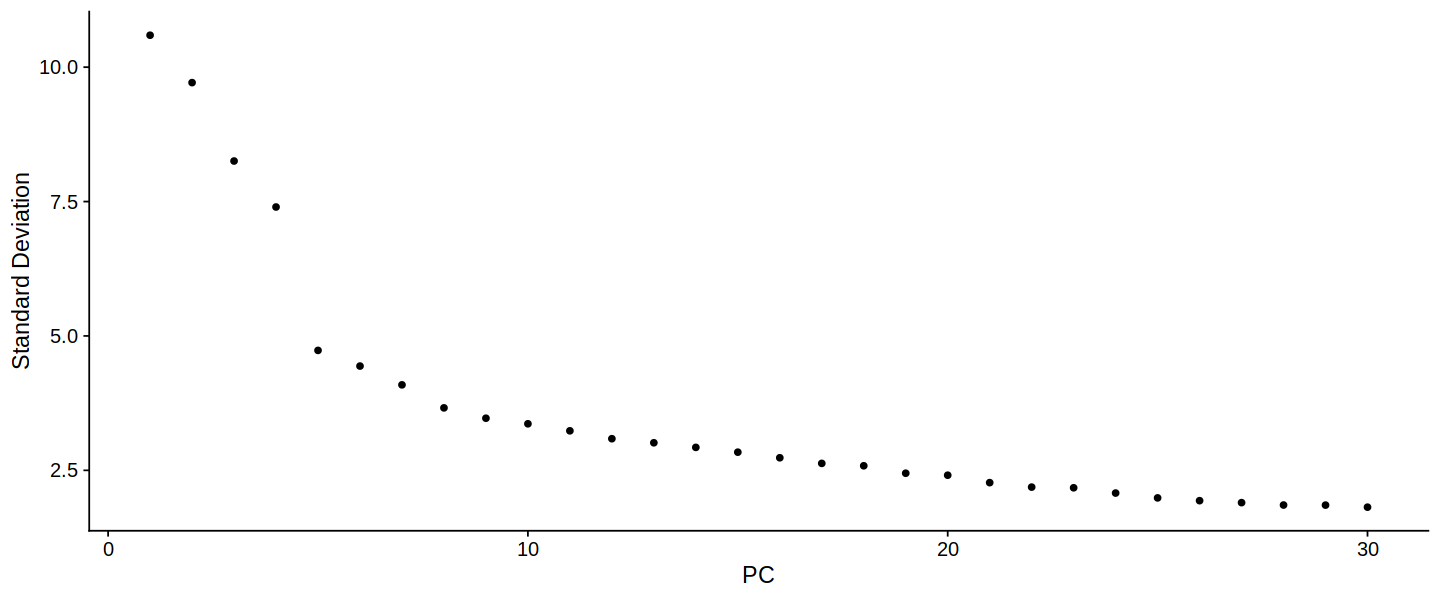

In [4]:
# run pca and harmony
sample <- RunPCA(sample, verbose = FALSE)
sample <- RunHarmony(sample, group.by.vars = "source", verbose = FALSE)
DimPlot(sample, reduction = "harmony", pt.size = 0.1, group.by = "source")
ElbowPlot(sample, ndims = 30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


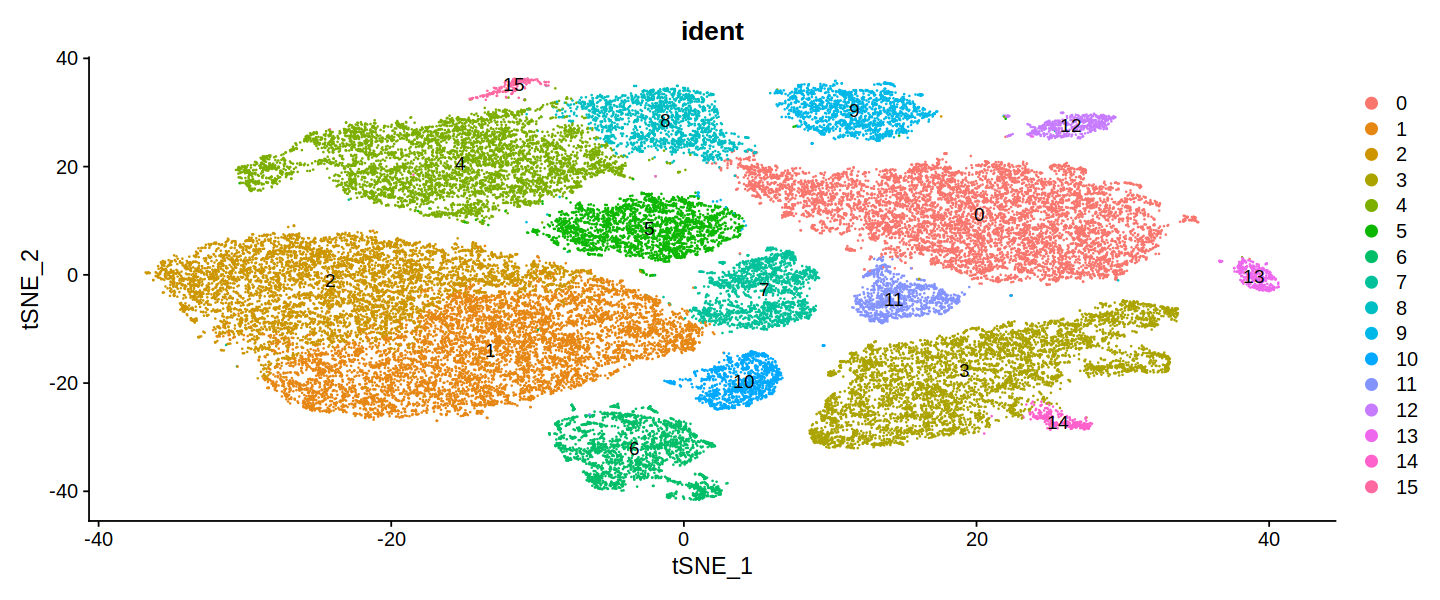

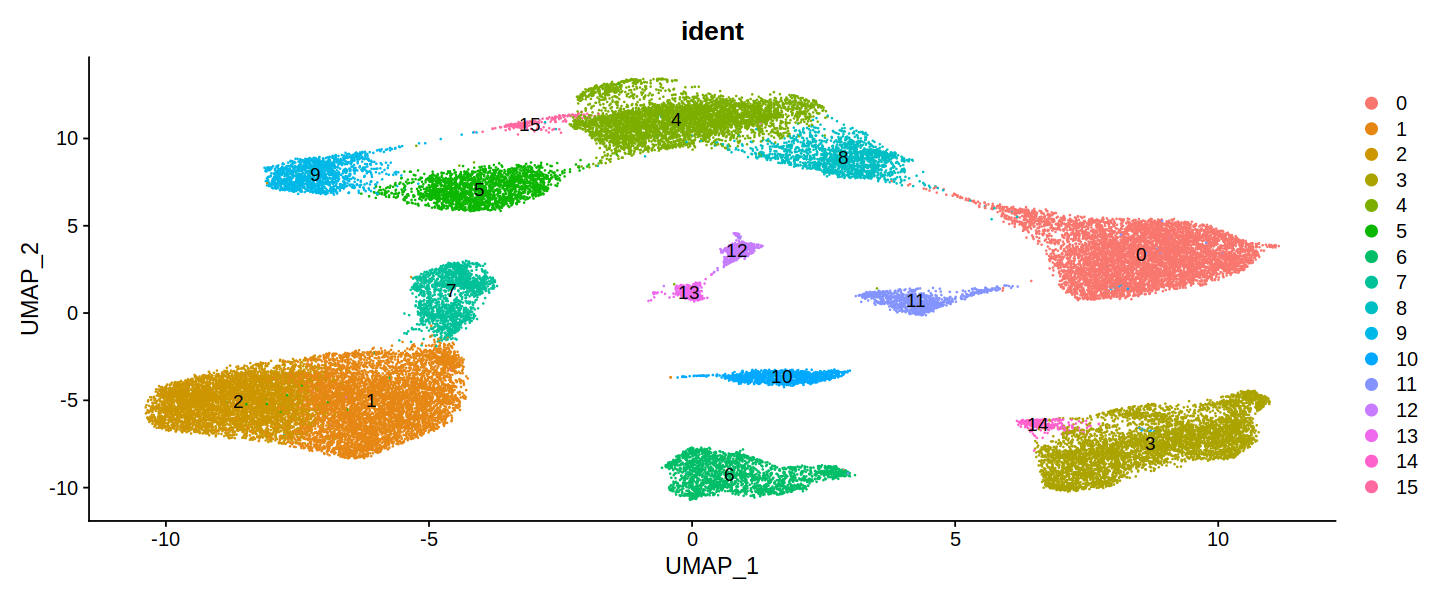

In [5]:
# dimension reduction and clustering
pca_dims <- 1:30
sample <- RunTSNE(sample, dims = pca_dims, reduction = "harmony", verbose = FALSE)
sample <- RunUMAP(sample, dims = pca_dims, reduction = "harmony", verbose = FALSE)
sample <- FindNeighbors(sample, dims = pca_dims, reduction = "harmony", verbose = FALSE)
sample <- FindClusters(sample, resolution = 0.5, verbose = FALSE)
DimPlot(sample, label=TRUE, reduction = "tsne", group.by = "ident", pt.size = 0.1)
DimPlot(sample, label=TRUE, reduction = "umap", group.by = "ident", pt.size = 0.1)

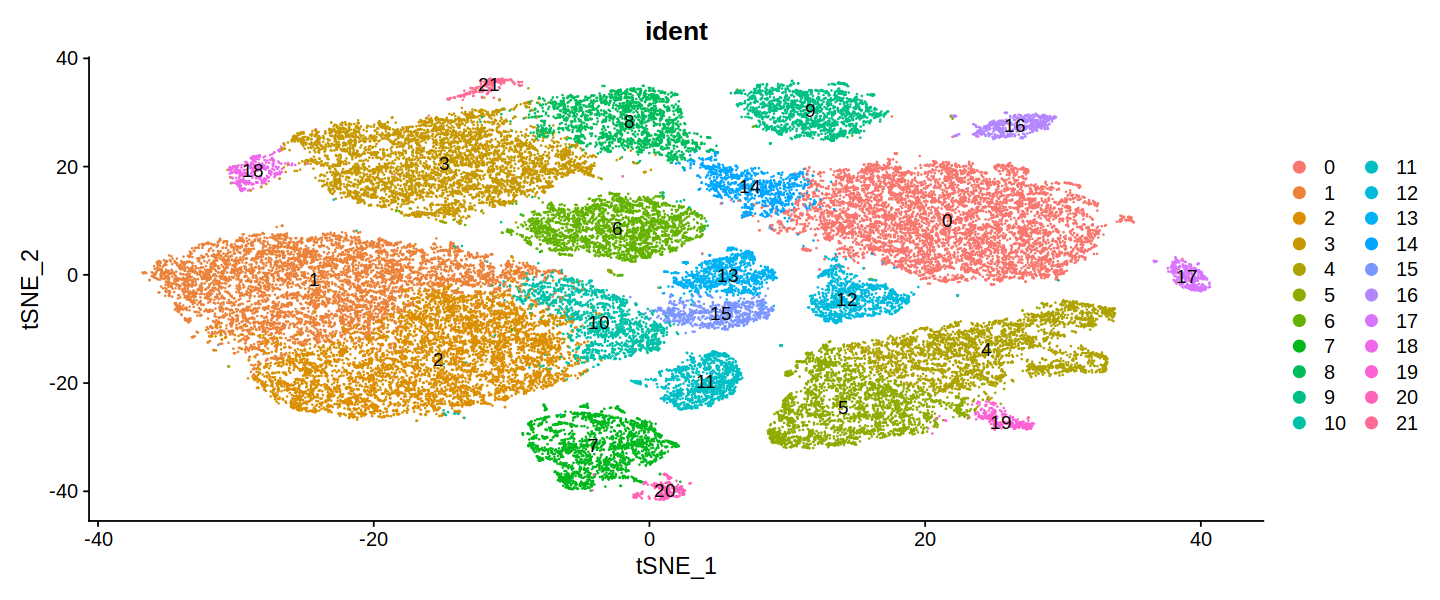

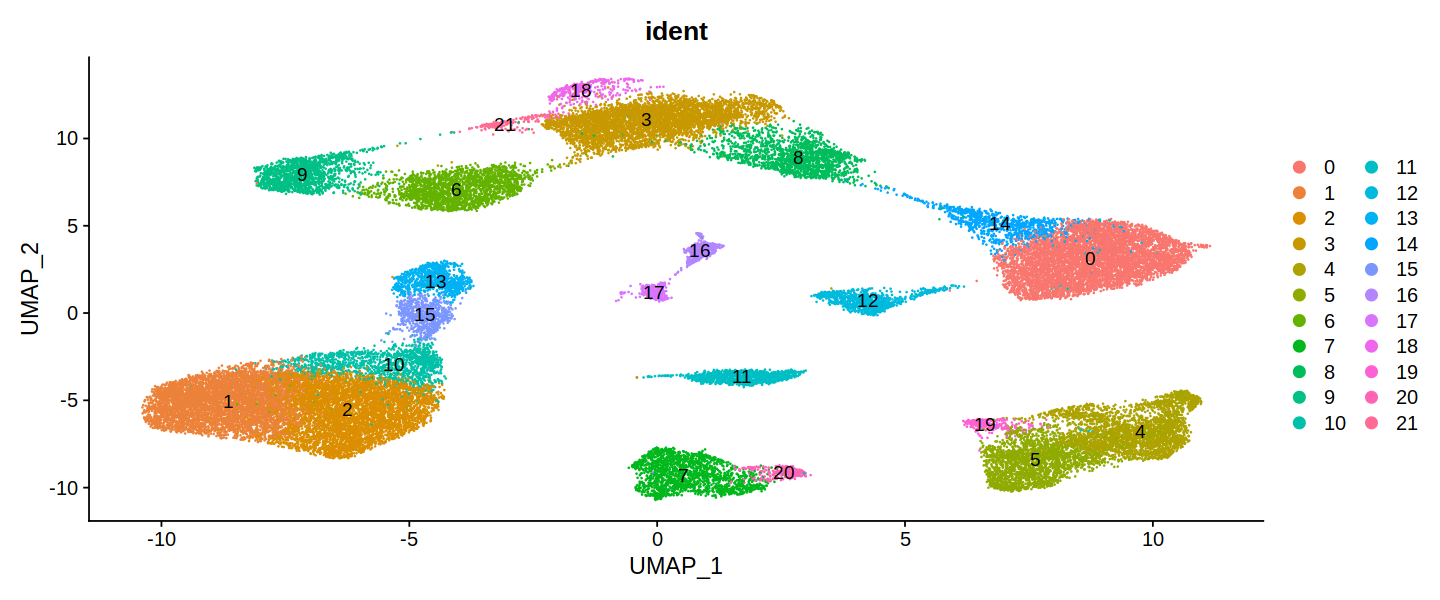

In [6]:
# add resolution
sample <- FindClusters(sample, resolution = 1, verbose = FALSE)
DimPlot(sample, label=TRUE, reduction = "tsne", group.by = "ident", pt.size = 0.1)
DimPlot(sample, label=TRUE, reduction = "umap", group.by = "ident", pt.size = 0.1)

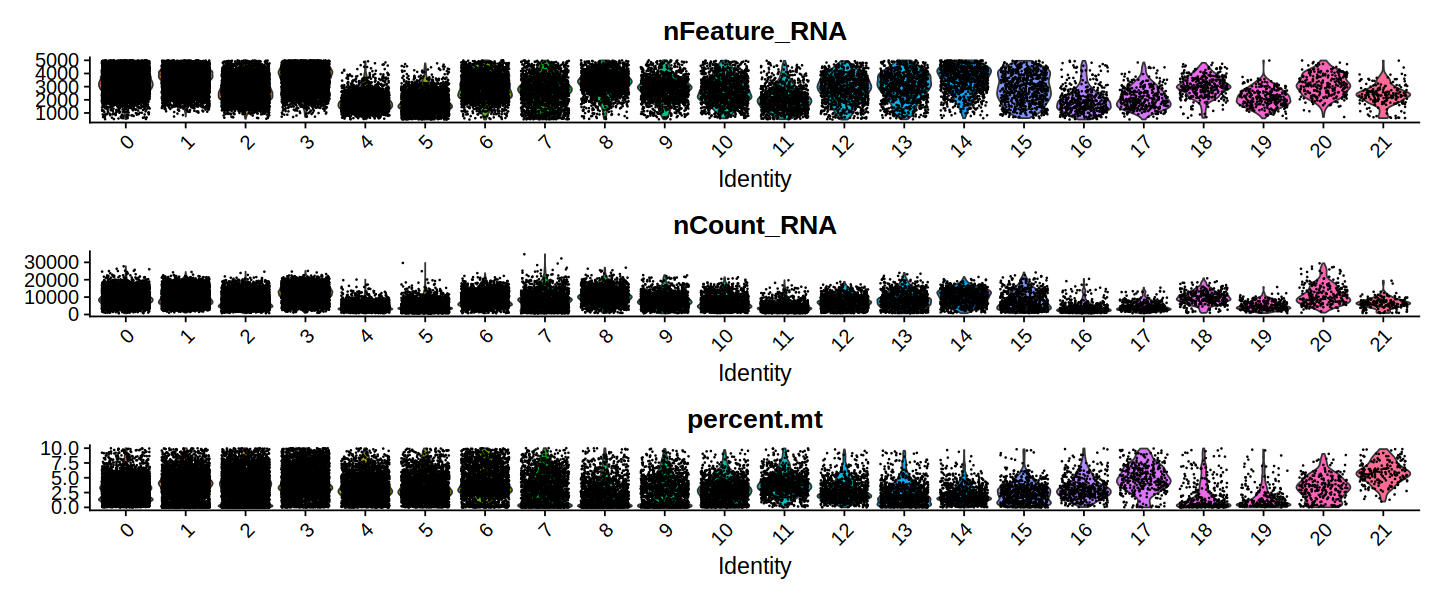

In [7]:
# quality control by cluster
VlnPlot(sample, features = c("nFeature_RNA","nCount_RNA","percent.mt"), group.by = "seurat_clusters", ncol = 1, pt.size = 0.1)
ggsave("figure/qc_sample_by_cluster.pdf", width = 10, height = 10)

Centering and scaling data matrix



An object of class Seurat 
33538 features across 41296 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)
 4 dimensional reductions calculated: pca, harmony, tsne, umap

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


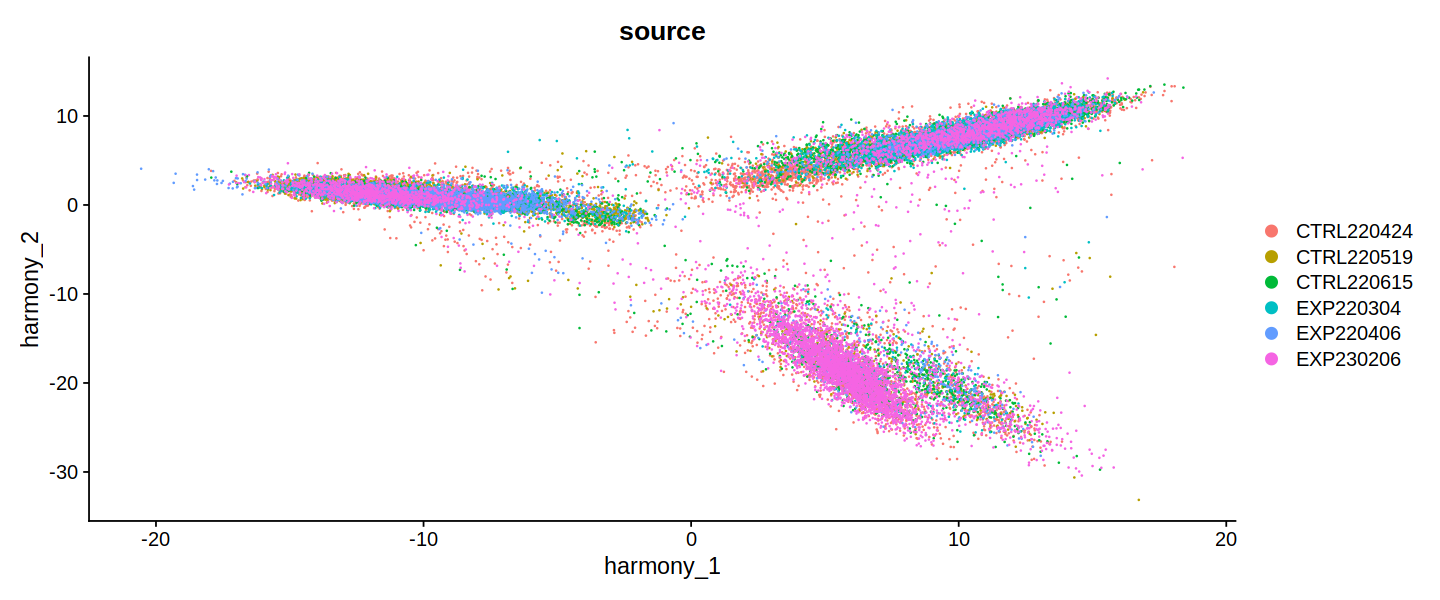

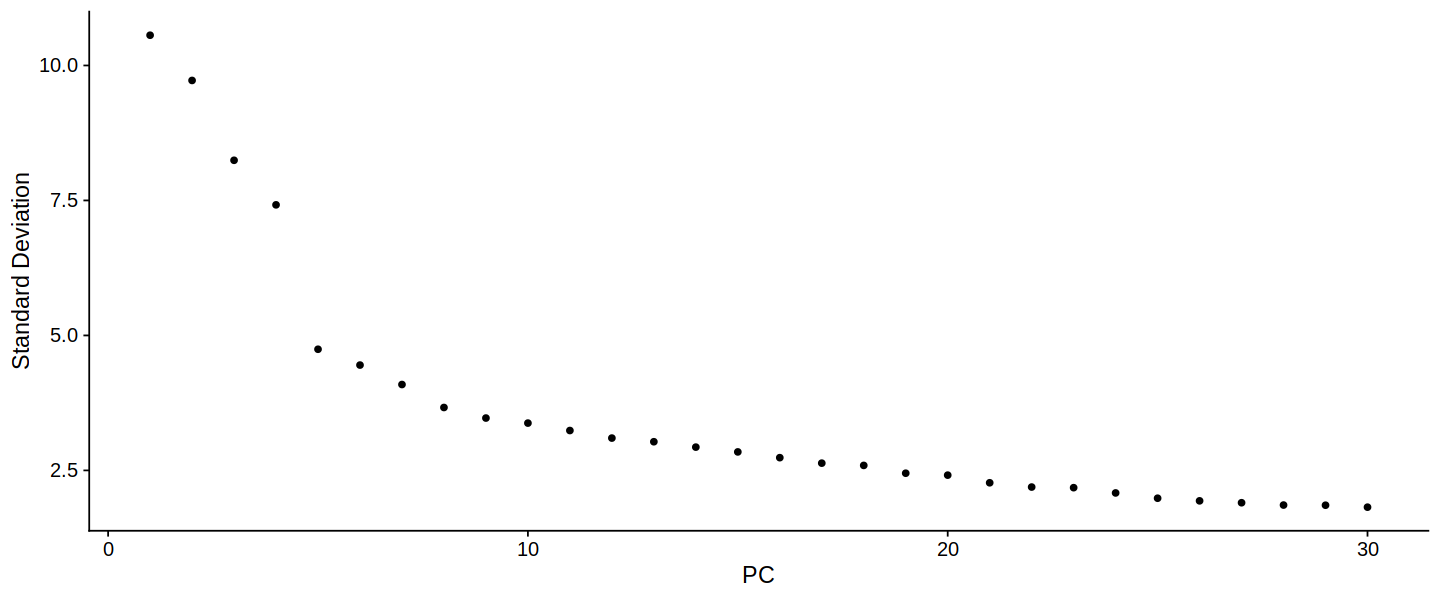

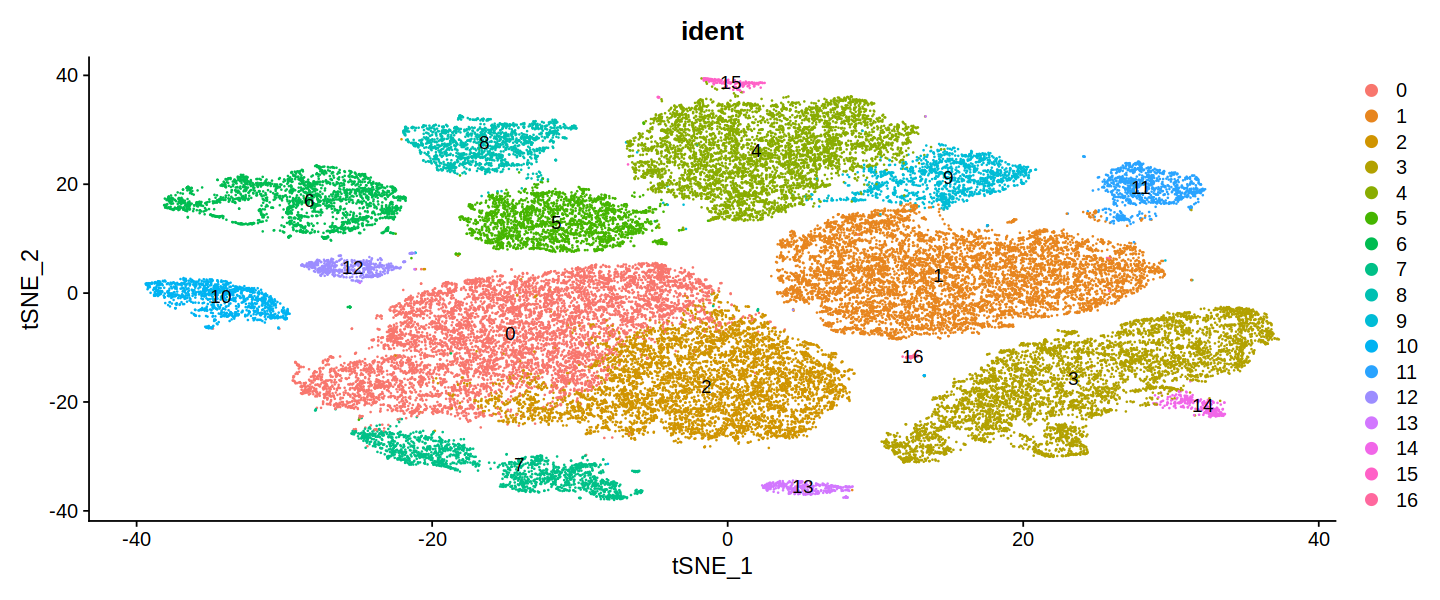

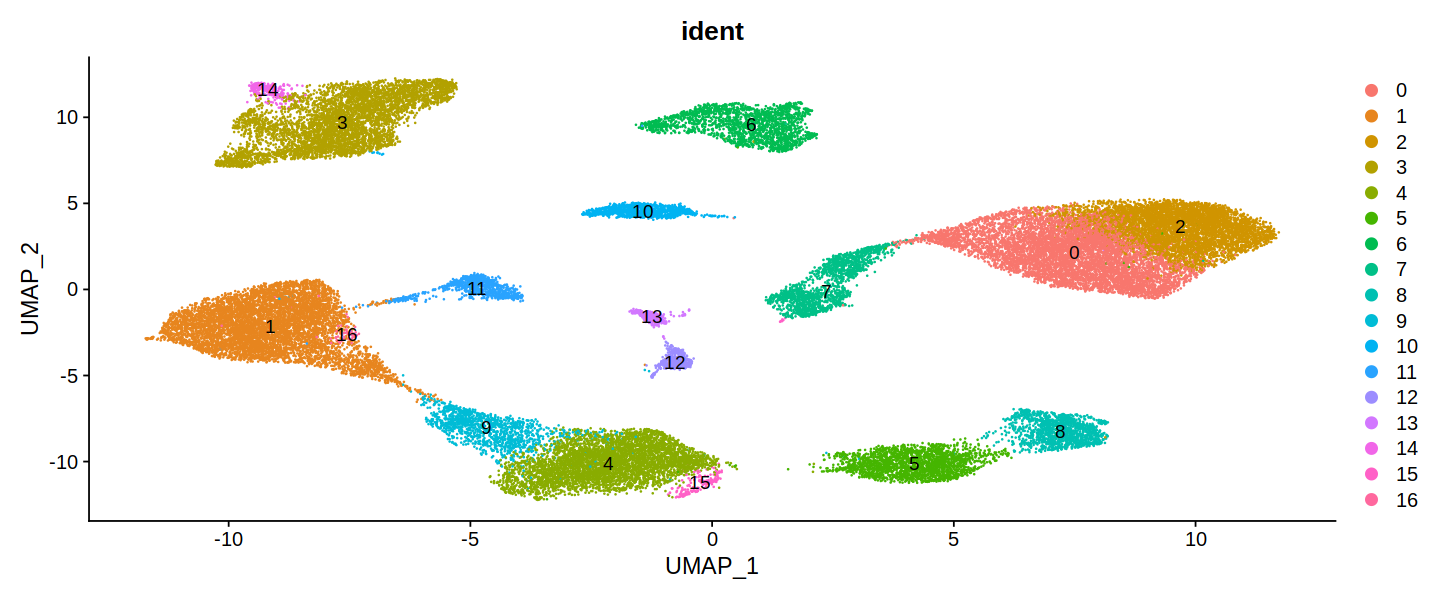

In [8]:
# remove cluster 18 and 21
sample <- subset(sample, idents = c(18, 21), invert = T)
sample <- NormalizeData(sample, normalization.method = "LogNormalize", scale.factor = 10000)

# find variable Genes and scale data
sample <- FindVariableFeatures(sample, selection.method = "vst")
sample <- ScaleData(sample)
sample

# run pca and harmony
sample <- RunPCA(sample, verbose = FALSE)
sample <- RunHarmony(sample, group.by.vars = "source", verbose = FALSE)
DimPlot(sample, reduction = "harmony", pt.size = 0.1, group.by = "source")
ElbowPlot(sample, ndims = 30)

# dimension reduction and clustering
pca_dims <- 1:30
sample <- RunTSNE(sample, dims = pca_dims, reduction = "harmony", verbose = FALSE)
sample <- RunUMAP(sample, dims = pca_dims, reduction = "harmony", verbose = FALSE)
sample <- FindNeighbors(sample, dims = pca_dims, reduction = "harmony", verbose = FALSE)
sample <- FindClusters(sample, resolution = 0.5, verbose = FALSE)
DimPlot(sample, label=TRUE, reduction = "tsne", group.by = "ident", pt.size = 0.1)
DimPlot(sample, label=TRUE, reduction = "umap", group.by = "ident", pt.size = 0.1)

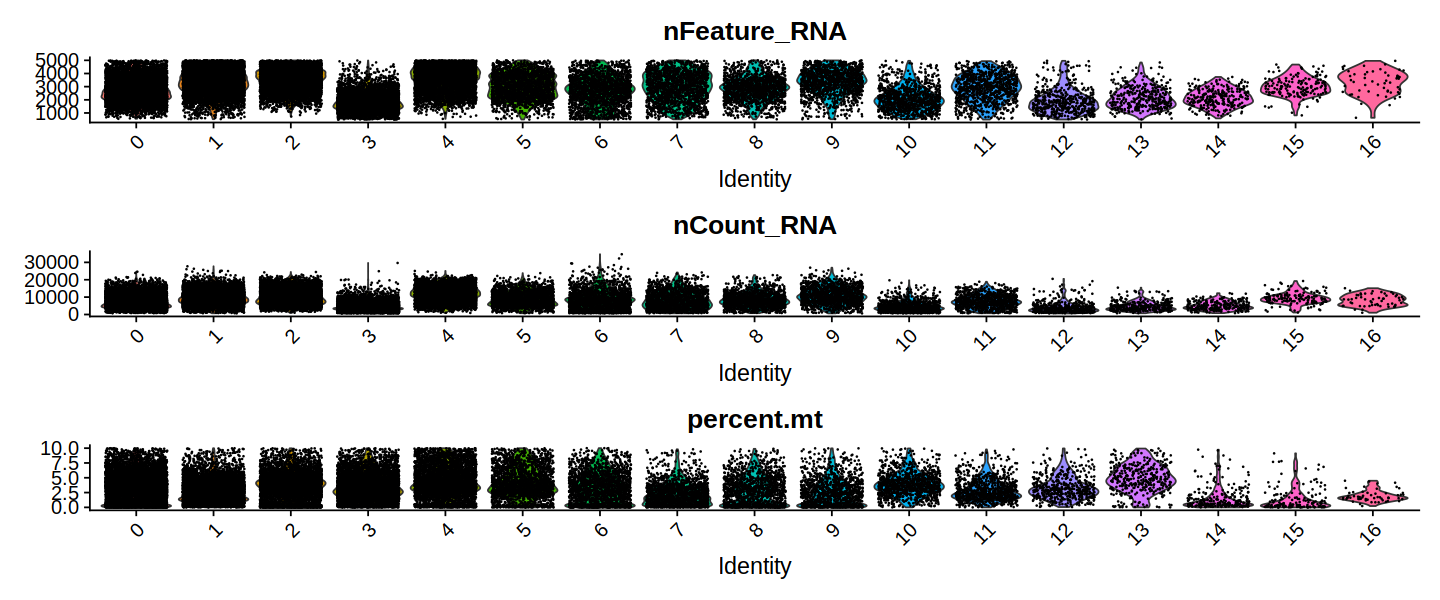

In [9]:
# quality control by cluster
VlnPlot(sample, features = c("nFeature_RNA","nCount_RNA","percent.mt"), group.by = "seurat_clusters", ncol = 1, pt.size = 0.1)
ggsave("figure/qc_sample_by_cluster_sub1.pdf", width = 10, height = 10)

Centering and scaling data matrix



An object of class Seurat 
33538 features across 41078 samples within 1 assay 
Active assay: RNA (33538 features, 2000 variable features)
 4 dimensional reductions calculated: pca, harmony, tsne, umap

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


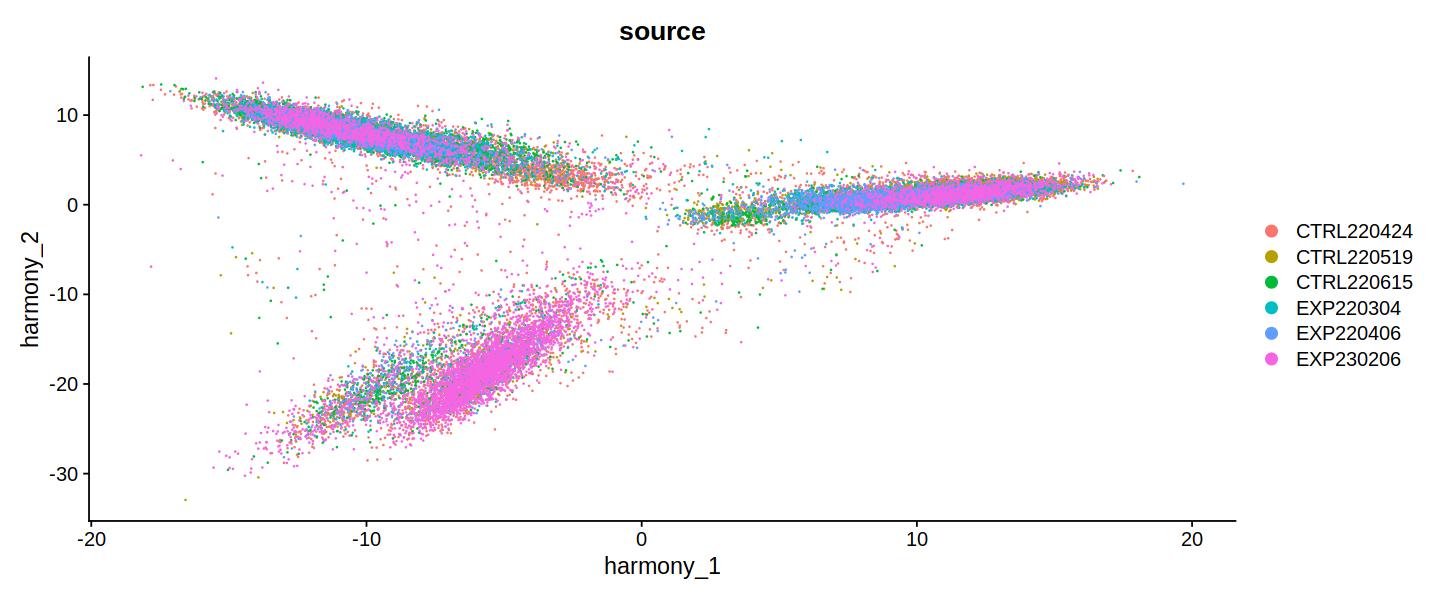

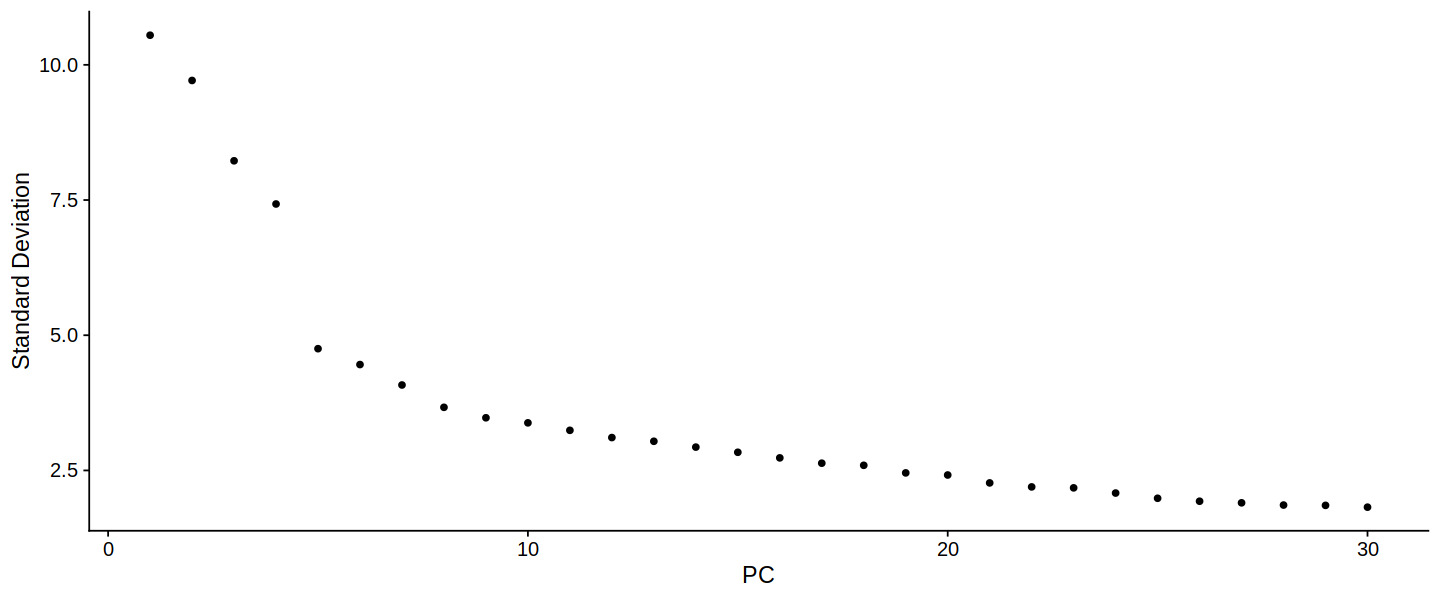

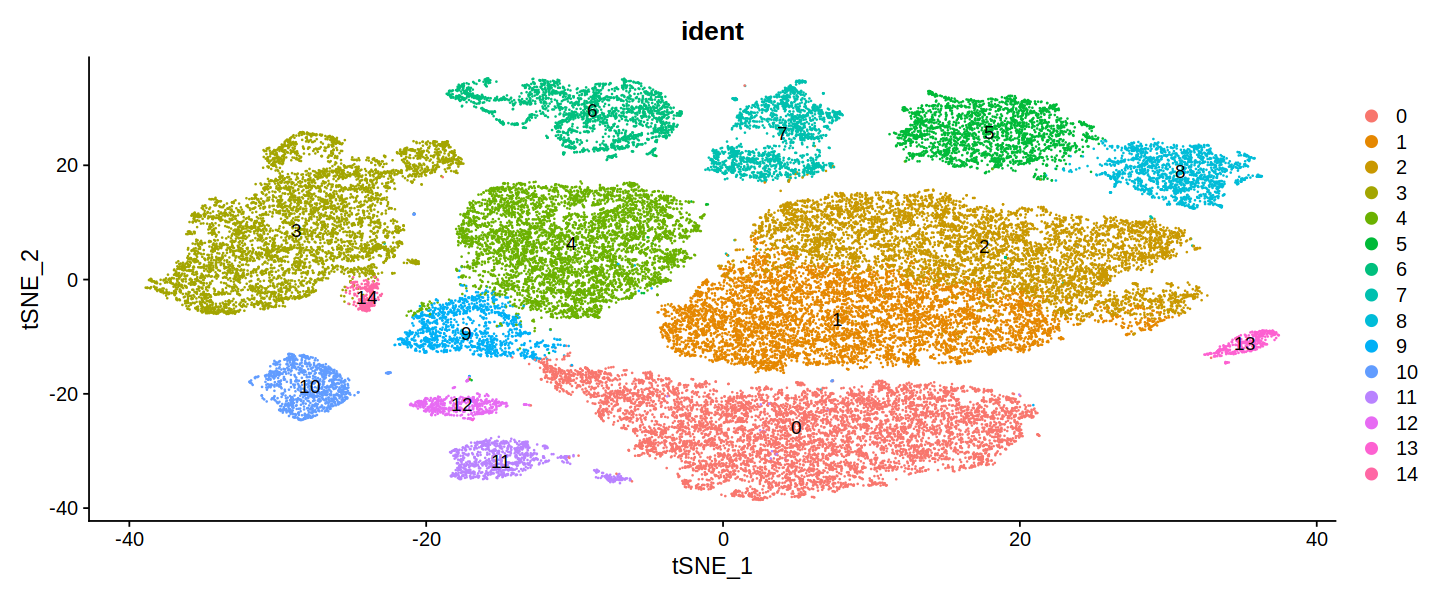

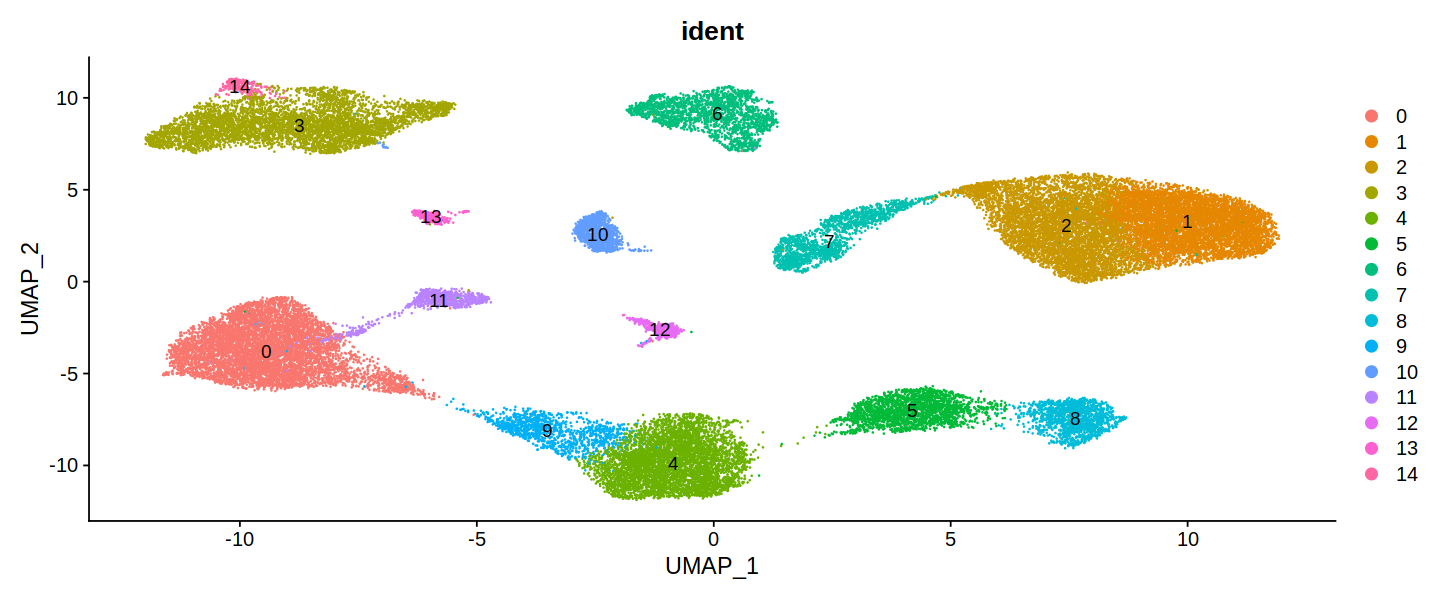

In [11]:
# remove cluster 15 and 16
sample <- subset(sample, idents = c(15, 16), invert = T)
sample <- NormalizeData(sample, normalization.method = "LogNormalize", scale.factor = 10000)

# find variable Genes and scale data
sample <- FindVariableFeatures(sample, selection.method = "vst")
sample <- ScaleData(sample)
sample

# run pca and harmony
sample <- RunPCA(sample, verbose = FALSE)
sample <- RunHarmony(sample, group.by.vars = "source", verbose = FALSE)
DimPlot(sample, reduction = "harmony", pt.size = 0.1, group.by = "source")
ElbowPlot(sample, ndims = 30)

# dimension reduction and clustering
pca_dims <- 1:30
sample <- RunTSNE(sample, dims = pca_dims, reduction = "harmony", verbose = FALSE)
sample <- RunUMAP(sample, dims = pca_dims, reduction = "harmony", verbose = FALSE)
sample <- FindNeighbors(sample, dims = pca_dims, reduction = "harmony", verbose = FALSE)
sample <- FindClusters(sample, resolution = 0.5, verbose = FALSE)
DimPlot(sample, label=TRUE, reduction = "tsne", group.by = "ident", pt.size = 0.1)
DimPlot(sample, label=TRUE, reduction = "umap", group.by = "ident", pt.size = 0.1)

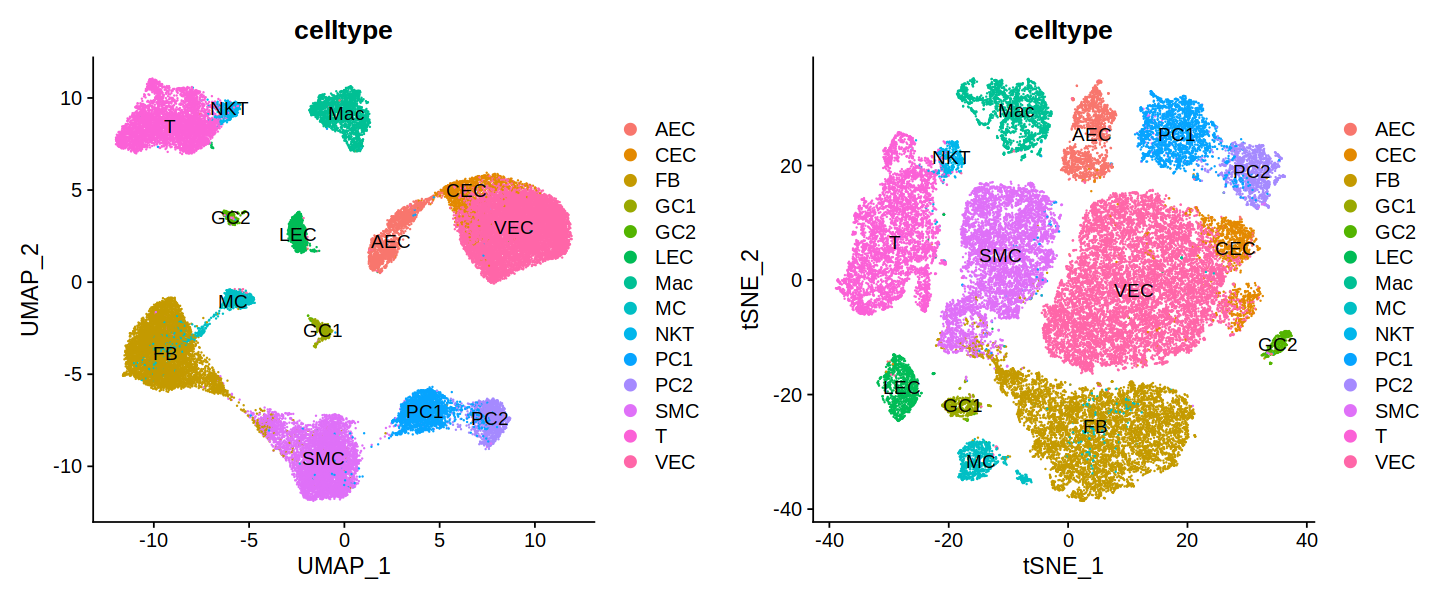

In [12]:
# plot tsne and umap
a <- DimPlot(sample, label = TRUE, reduction = "umap", group.by = "celltype")
b <- DimPlot(sample, label = TRUE, reduction = "tsne", group.by = "celltype")
plot_grid(a, b, ncol = 2)

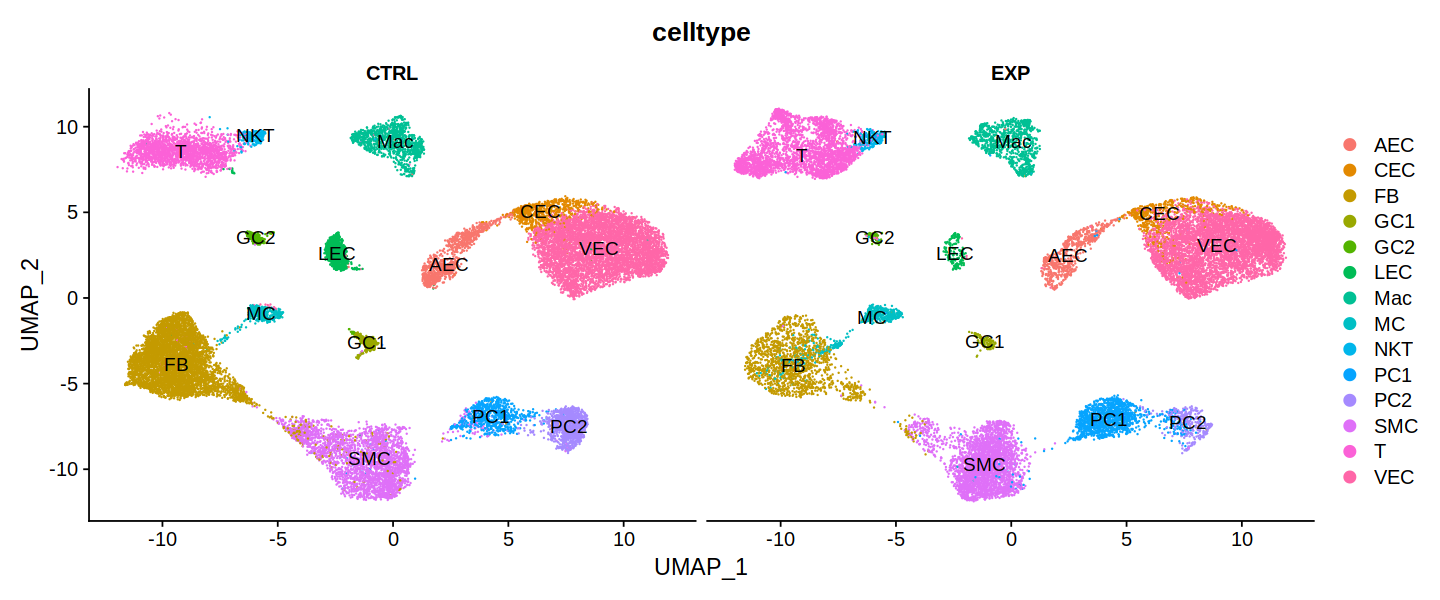

In [13]:
# plot split umap
sample$condition <- "undefined"
sample$condition[grep("CTRL", sample$orig.ident)] <- "CTRL"
sample$condition[grep("EXP", sample$orig.ident)] <- "EXP"
DimPlot(sample, label = TRUE, reduction = "umap", group.by = "celltype", split.by = "condition")

In [15]:
# save the integrated sample
saveRDS(sample, file = "./rds/sample_DCM_CAD_integrated.rds")

In [16]:
# list the session info
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /data/zju/ty/miniconda/envs/singlecell/lib/libopenblasp-r0.3.3.so;  LAPACK version 3.8.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

time zone: Asia/Shanghai
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] cowplot_1.1.1      ggrepel_0.9.4      RColorBrewer_1.1-3 viridis_0.6.4     
 [5] viridisLite_0.4.2  Hmisc_5.1-1        Matrix_1.6-1.1     dplyr_1.1.4       
 [9] ggplot2_3.5.1      harmony_0.1.1      Rcpp_1.0.11       